# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Monica Elisabeth Mamondol
- Email: bethlisa125@gmail.com
- Id Dicoding: monica_mamondol

## Persiapan

### Menyiapkan library yang dibutuhkan

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan digunakan

In [2]:
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv"
df = pd.read_csv(url, delimiter=';')

## **Data Understanding**

**Melihat 5 baris teratas dari dataset.**

In [3]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


**Mengubah beberapa kolom numerik yang seharusnya bersifat kategorikal**

In [4]:
# Mappings for categorical columns
marital_status_mapping = {
    1: 'single', 2: 'married', 3: 'widower', 4: 'divorced', 5: 'facto union', 6: 'legally separated'
}

application_mode_mapping = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2 (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}

course_mapping = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

daytime_evening_mapping = {
    1: 'daytime', 0: 'evening'
}

previous_qualification_mapping = {
    1: 'Secondary education',
    2: 'Higher education - bachelor\'s degree',
    3: 'Higher education - degree',
    4: 'Higher education - master\'s',
    5: 'Higher education - doctorate',
    6: 'Frequency of higher education',
    9: '12th year of schooling - not completed',
    10: '11th year of schooling - not completed',
    12: 'Other - 11th year of schooling',
    14: '10th year of schooling',
    15: '10th year of schooling - not completed',
    19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
    38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    42: 'Professional higher technical course',
    43: 'Higher education - master (2nd cycle)'
}

nationality_mapping = {
    1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian', 13: 'Dutch', 14: 'English',
    17: 'Lithuanian', 21: 'Angolan', 22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican',
    26: 'Santomean', 32: 'Turkish', 41: 'Brazilian', 62: 'Romanian', 100: 'Moldova (Republic of)',
    101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban', 109: 'Colombian'
}

qualification_mapping = {
    1: 'Secondary Education - 12th Year of Schooling or Eq.',
    2: 'Higher Education - Bachelor\'s Degree',
    3: 'Higher Education - Degree',
    4: 'Higher Education - Master\'s',
    5: 'Higher Education - Doctorate',
    6: 'Frequency of Higher Education',
    9: '12th Year of Schooling - Not Completed',
    10: '11th Year of Schooling - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year of Schooling',
    14: '10th Year of Schooling',
    18: 'General commerce course',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
    22: 'Technical-professional course',
    26: '7th year of schooling',
    27: '2nd cycle of the general high school course',
    29: '9th Year of Schooling - Not Completed',
    30: '8th year of schooling',
    34: 'Unknown',
    35: 'Can\'t read or write',
    36: 'Can read without having a 4th year of schooling',
    37: 'Basic education 1st cycle (4th/5th year) or equiv.',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    41: 'Specialized higher studies course',
    42: 'Professional higher technical course',
    43: 'Higher Education - Master (2nd cycle)',
    44: 'Higher Education - Doctorate (3rd cycle)'
}

occupation_mapping = {
    0: 'Student',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security and Safety Workers and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
    7: 'Skilled Workers in Industry, Construction and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: 'blank',
    122: 'Health professionals',
    123: 'teachers',
    125: 'Specialists in information and communication technologies (ICT)',
    131: 'Intermediate level science and engineering technicians and professions',
    132: 'Technicians and professionals, of intermediate level of health',
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
    141: 'Office workers, secretaries in general and data processing operators',
    143: 'Data, accounting, statistical, financial services and registry-related operators',
    144: 'Other administrative support staff',
    151: 'Personal service workers',
    152: 'Sellers',
    153: 'Personal care workers and the like',
    171: 'Skilled construction workers and the like, except electricians',
    173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    191: 'Cleaning workers',
    192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
    194: 'Meal preparation assistants',
    195: 'Street vendors (except food) and street service providers'
}

displaced_mapping = {0: 'no', 1: 'yes'}

educational_special_needs = {0: 'no', 1: 'yes'}

debtor = {0: 'no', 1: 'yes'}

tuition_fees_up_to_date = {0: 'no', 1: 'yes'}

gender = {0: 'female', 1: 'male'}

scholarship_holder = {0: 'no', 1: 'yes'}

international = {0: 'no', 1: 'yes'}

# Apply mappings to the columns
df['Marital_status'] = df['Marital_status'].map(marital_status_mapping)
df['Application_mode'] = df['Application_mode'].map(application_mode_mapping)
df['Course'] = df['Course'].map(course_mapping)
df['Daytime_evening_attendance'] = df['Daytime_evening_attendance'].map(daytime_evening_mapping)
df['Previous_qualification'] = df['Previous_qualification'].map(previous_qualification_mapping)
df['Nacionality'] = df['Nacionality'].map(nationality_mapping)
df['Mothers_qualification'] = df['Mothers_qualification'].map(qualification_mapping)
df['Fathers_qualification'] = df['Fathers_qualification'].map(qualification_mapping)
df['Mothers_occupation'] = df['Mothers_occupation'].map(occupation_mapping)
df['Fathers_occupation'] = df['Fathers_occupation'].map(occupation_mapping)
df['Displaced'] = df['Displaced'].map(displaced_mapping)
df['Educational_special_needs'] = df['Educational_special_needs'].map(educational_special_needs)
df['Debtor'] = df['Debtor'].map(debtor)
df['Tuition_fees_up_to_date'] = df['Tuition_fees_up_to_date'].map(tuition_fees_up_to_date)
df['Gender'] = df['Gender'].map(gender)
df['Scholarship_holder'] = df['Scholarship_holder'].map(scholarship_holder)
df['International'] = df['International'].map(international)

df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1st phase - general contingent,6,Journalism and Communication,daytime,Secondary education,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,single,1st phase - general contingent,2,Journalism and Communication,daytime,Secondary education,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,single,1st phase - general contingent,1,Nursing,daytime,Secondary education,154.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,single,1st phase - general contingent,1,Management,daytime,Secondary education,180.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## **Exploratory Data Analysis**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4419 non-null   o

**Mengecek missing value**

In [6]:
df.isnull().sum()[df.isnull().sum() > 0]

,0
Fathers_qualification,5
Fathers_occupation,33


**Mengecek duplikasi pada dataset**

In [7]:
duplicate_count = df.duplicated().sum()
print("Jumlah duplikasi: ", duplicate_count)

Jumlah duplikasi:  0


**Insight:**
- Total baris: 4424
- Total kolom: 37
- Ada data missing value di kolom `Fathers_qualification` dan `Fathers_occupation`.
- Tidak ada data yang terduplikat.
- Tipe data terdiri dari float64(7), int64(12), object(18).

In [8]:
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Admission_grade,4424.0,126.978119,14.482001,95.00,117.90,126.100000,134.800000,190.000000
Age_at_enrollment,4424.0,23.265145,7.587816,17.00,19.00,20.000000,25.000000,70.000000
Curricular_units_1st_sem_credited,4424.0,0.709991,2.360507,0.00,0.00,0.000000,0.000000,20.000000
Curricular_units_1st_sem_enrolled,4424.0,6.270570,2.480178,0.00,5.00,6.000000,7.000000,26.000000
Curricular_units_1st_sem_evaluations,4424.0,8.299051,4.179106,0.00,6.00,8.000000,10.000000,45.000000
Curricular_units_1st_sem_approved,4424.0,4.706600,3.094238,0.00,3.00,5.000000,6.000000,26.000000
Curricular_units_1st_sem_grade,4424.0,10.640822,4.843663,0.00,11.00,12.285714,13.400000,18.875000
Curricular_units_1st_sem_without_evaluations,4424.0,0.137658,0.690880,0.00,0.00,0.000000,0.000000,12.000000


### **Univariate Analysis**

**Melakukan univariate analysis untuk kolom numerik**

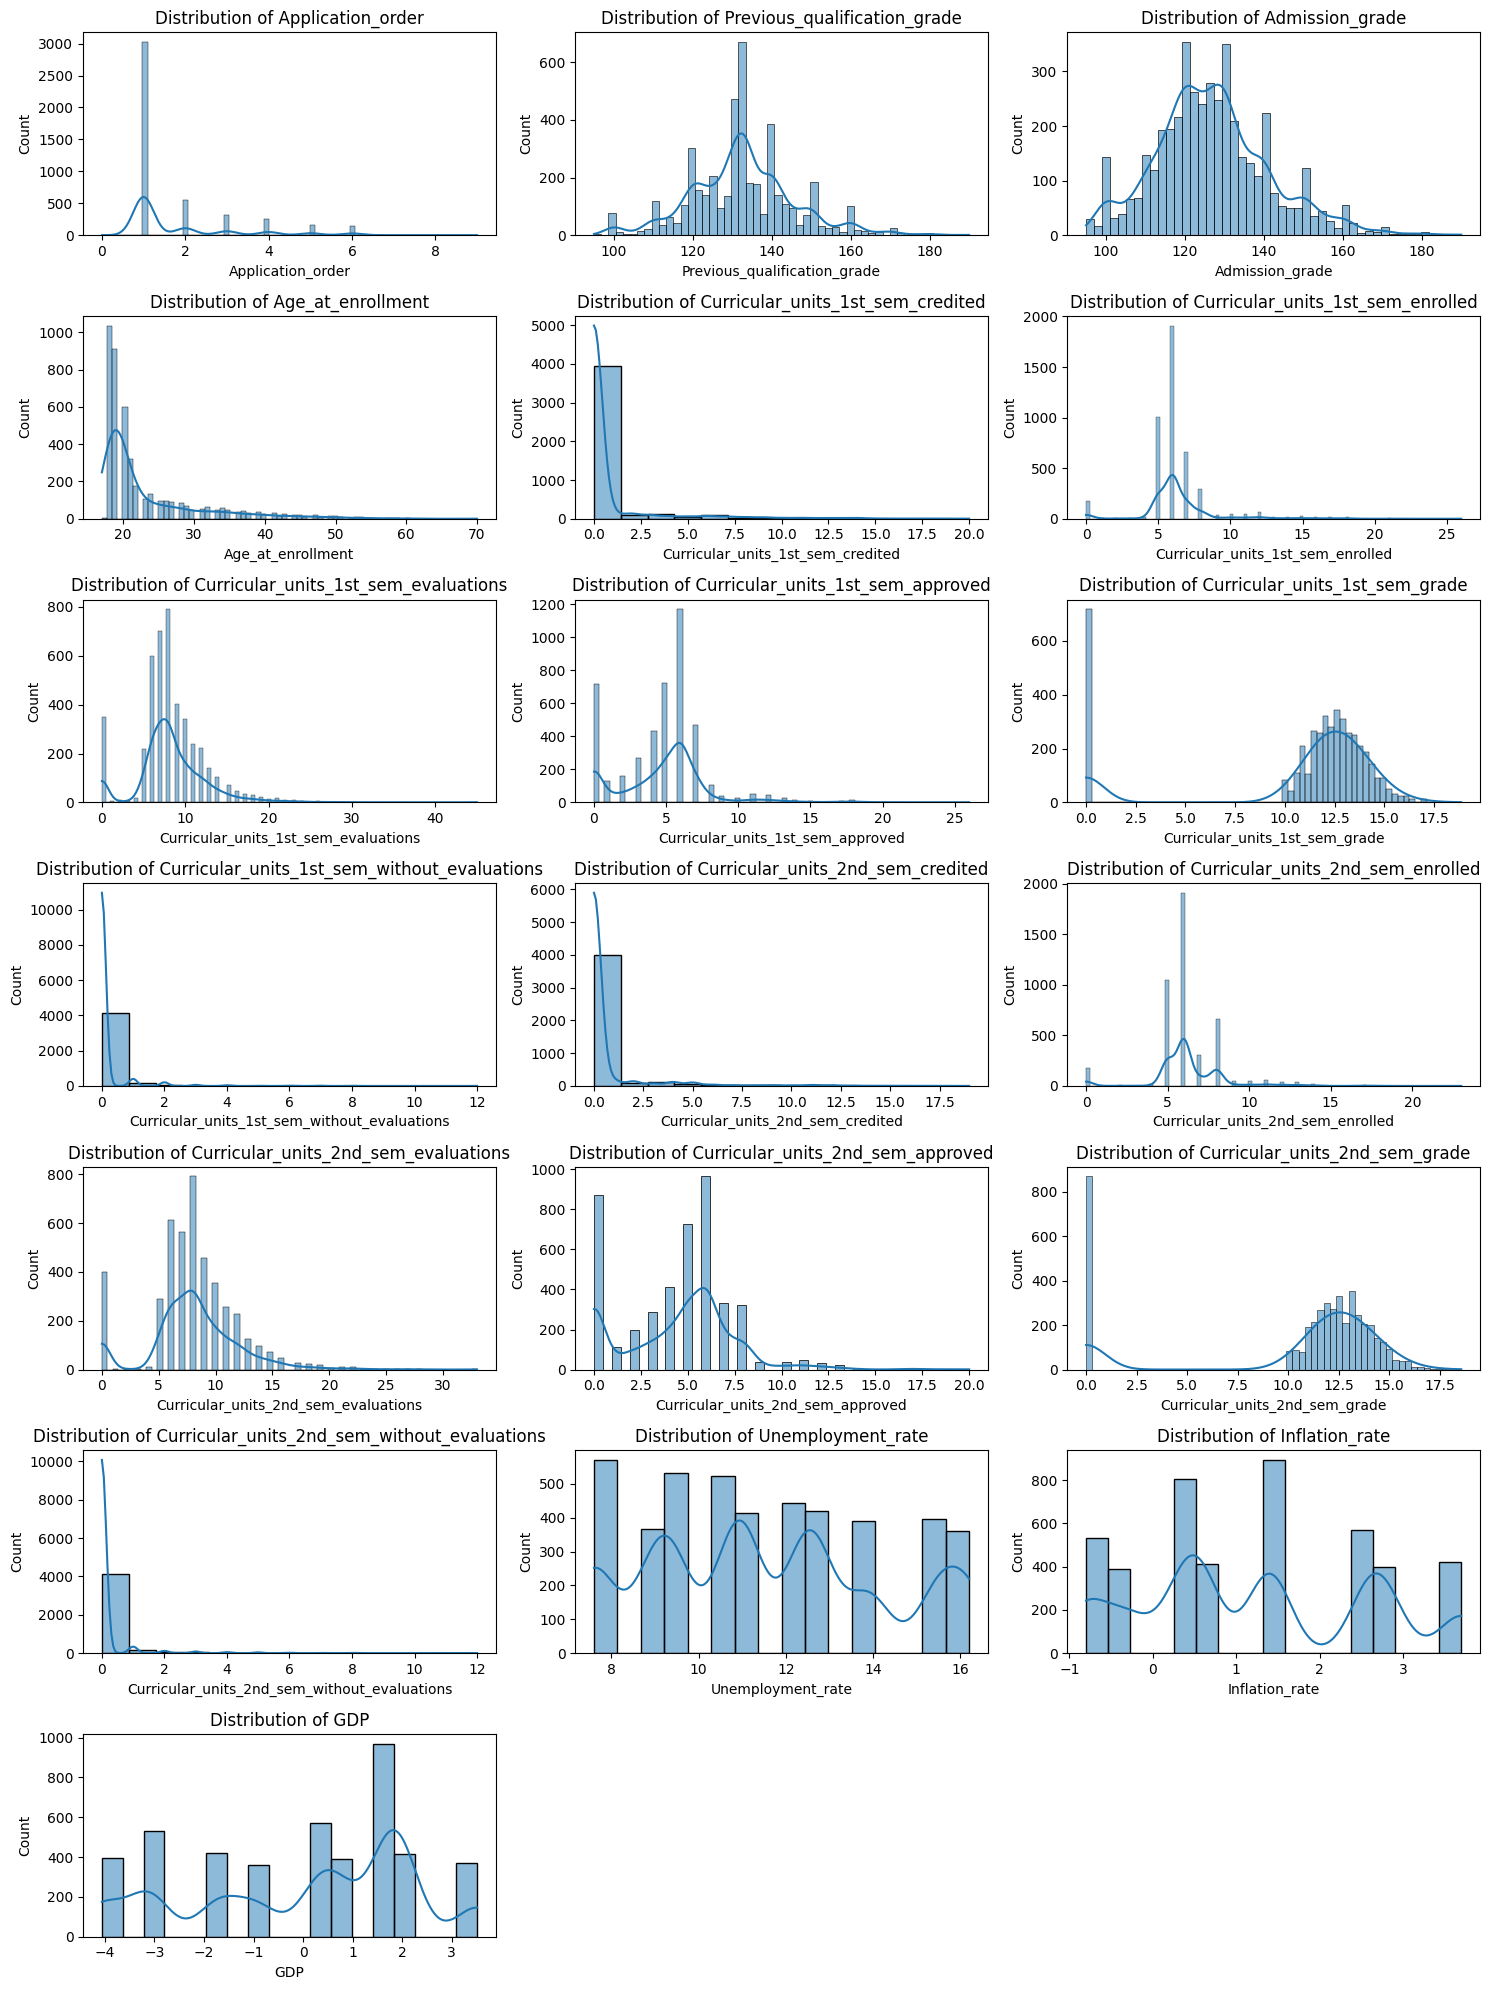

In [9]:
# Identifikasi kolom numerical
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Univariate analysis untuk numerical variables
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Insight:**

🎓 **Fitur Akademik**

**1. Nilai Akademik:**

- Previous_qualification_grade dan Admission_grade mengikuti distribusi normal, menunjukkan sebaran nilai masuk cukup seimbang di populasi.

- Curricular_units_1st_sem_grade dan Curricular_units_2nd_sem_grade juga menunjukkan pola distribusi normal, meskipun dengan sedikit skew.

**2. Unit Akademik:**

Fitur seperti Curricular_units_1st/2nd_sem_enrolled, evaluations, dan approved umumnya menunjukkan bahwa:

- Mayoritas mahasiswa mengambil jumlah unit dan evaluasi yang rendah, kemungkinan karena sistem modular atau dropout di awal semester.

- Terdapat ketimpangan signifikan dalam banyak fitur, yang dapat menunjukkan sebagian mahasiswa tidak menyelesaikan evaluasi atau mengulang.

**3. Tanpa Evaluasi:**

- Banyak siswa memiliki nilai nol di fitur without_evaluations, tapi ada juga lonjakan yang menunjukkan tidak mengikuti ujian sama sekali — ini indikator kuat dropout.

📊 **Demografik dan Sosial-Ekonomi**

**1. Age_at_enrollment:**

- Mayoritas mahasiswa berusia antara 20–30 tahun. Terdapat outlier hingga usia 70 tahun, mungkin mahasiswa non-tradisional.

**2. Application_order:**

- Banyak mahasiswa mendaftar sebagai pilihan pertama, namun ada sebagian kecil yang masuk dari pilihan kedua atau lebih, yang bisa mencerminkan kurangnya motivasi awal.

🌍 **Makroekonomi**

1. **Unemployment_rate, Inflation_rate, GDP:**

- Ketiga fitur ini memiliki sebaran yang merata (tidak normal), menunjukkan variasi kondisi makroekonomi dalam periode waktu tertentu.

### **Multivariate Analysis**

**Melakukan multivariate analysis relatif terhadap kolom target yaitu** `status`.

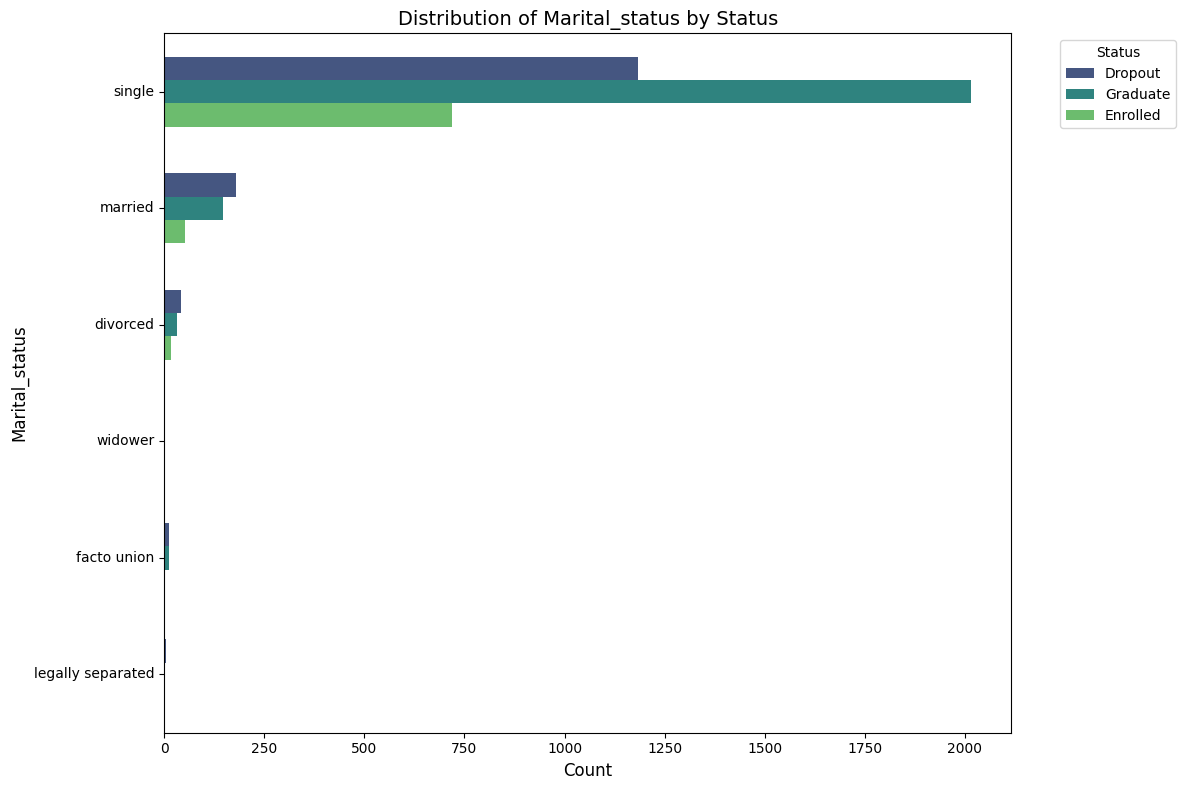

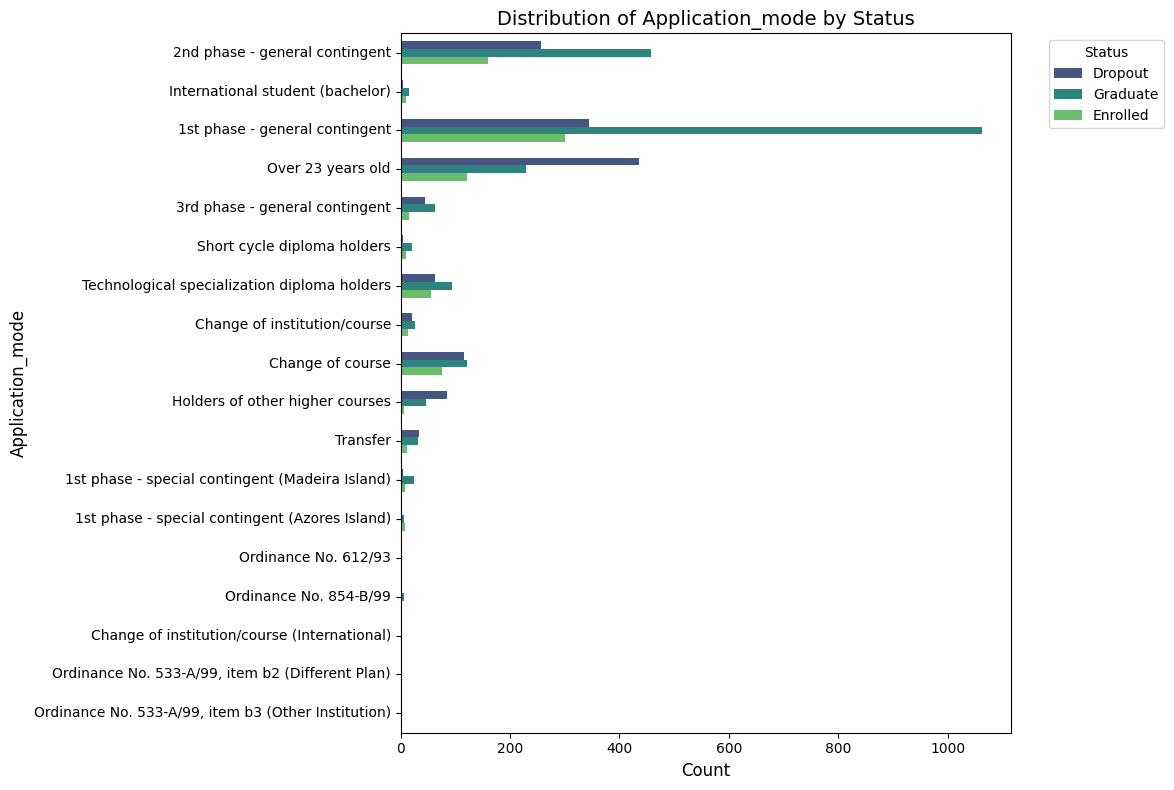

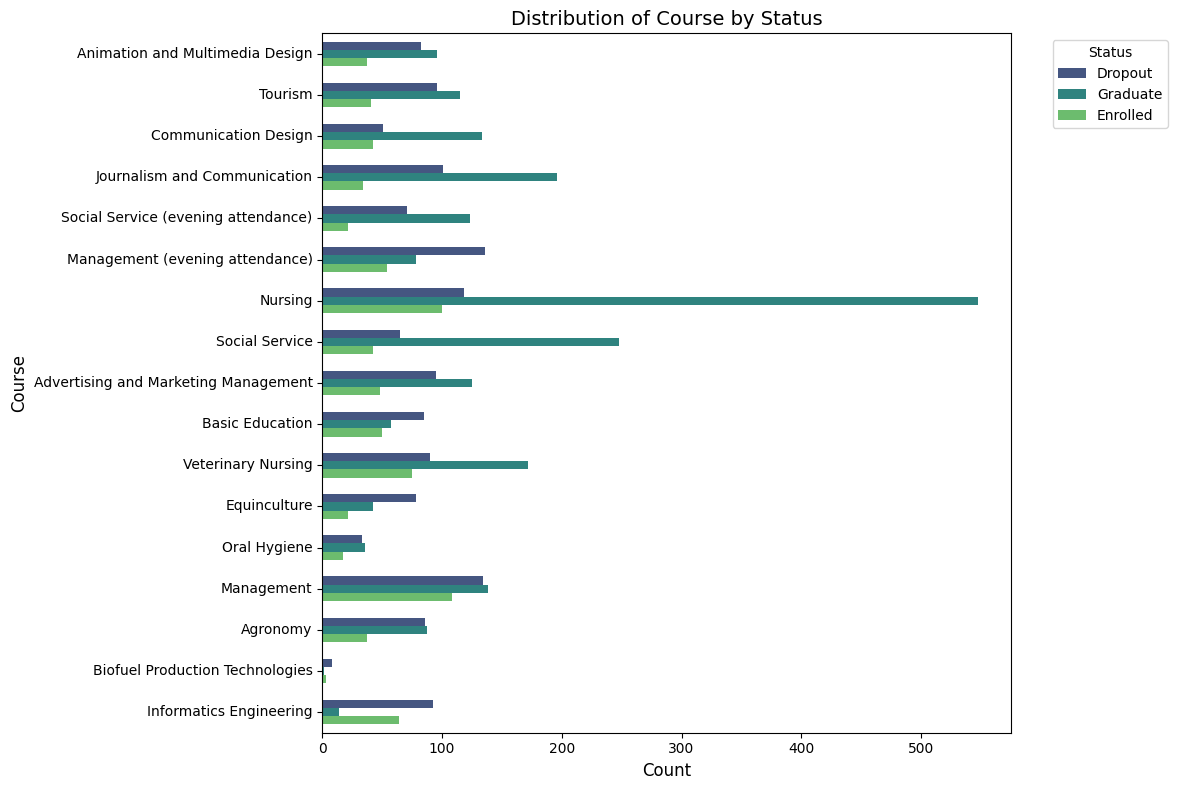

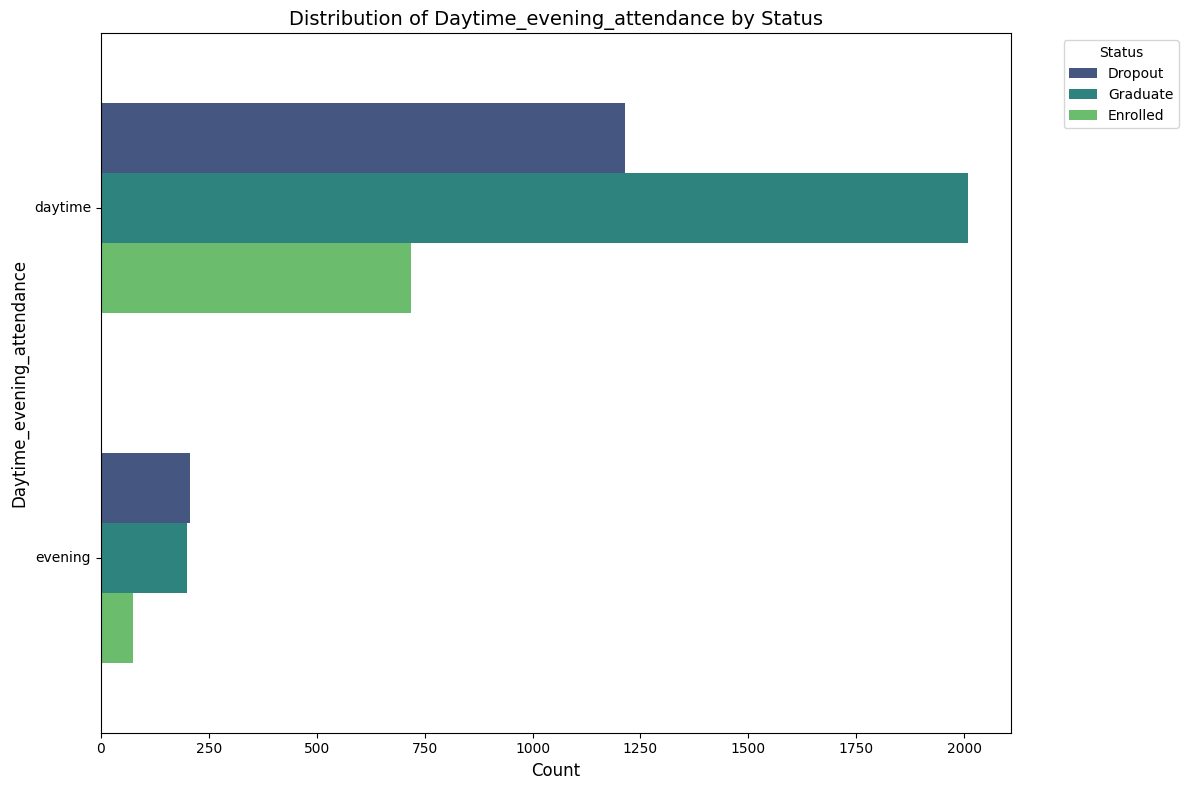

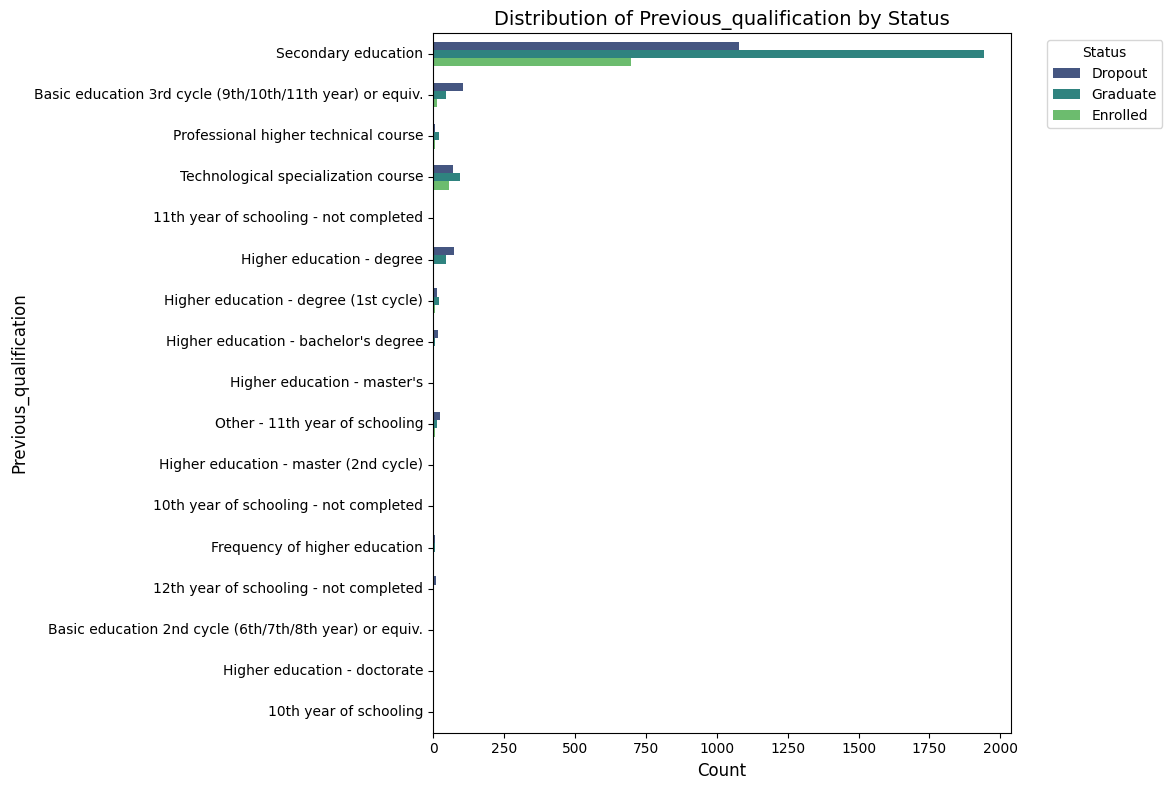

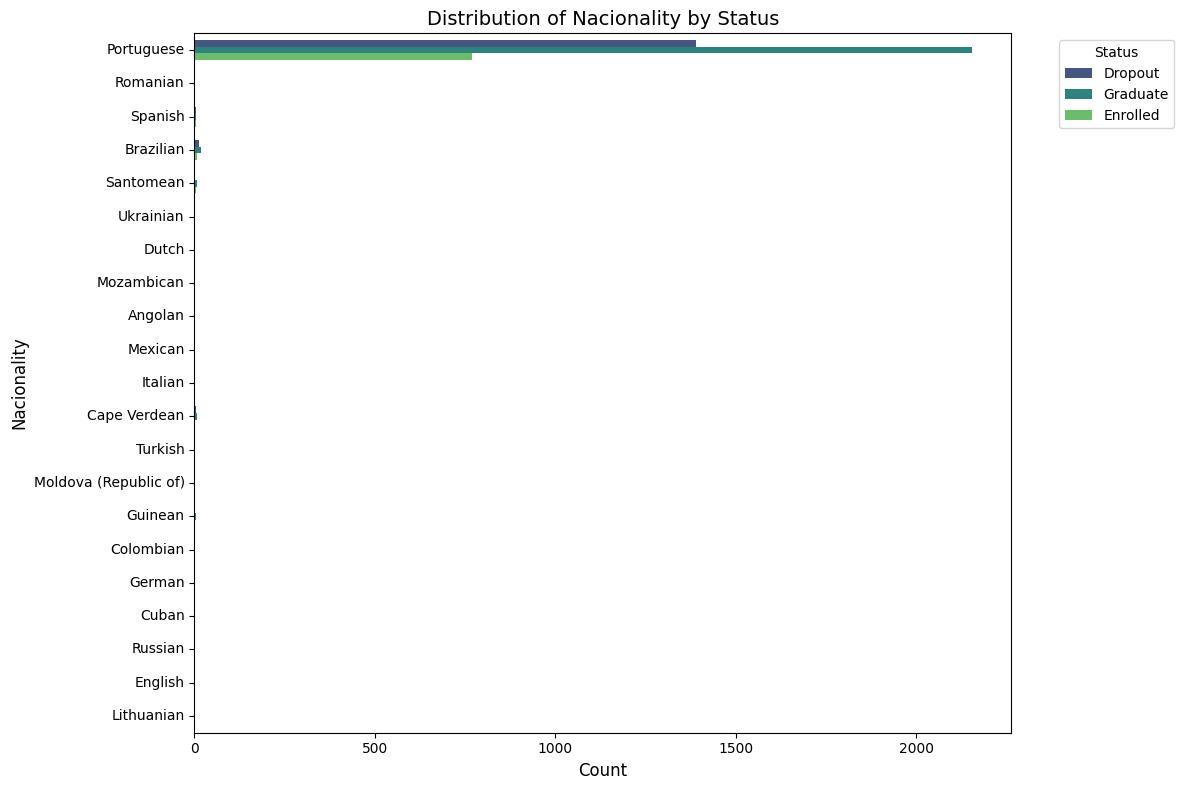

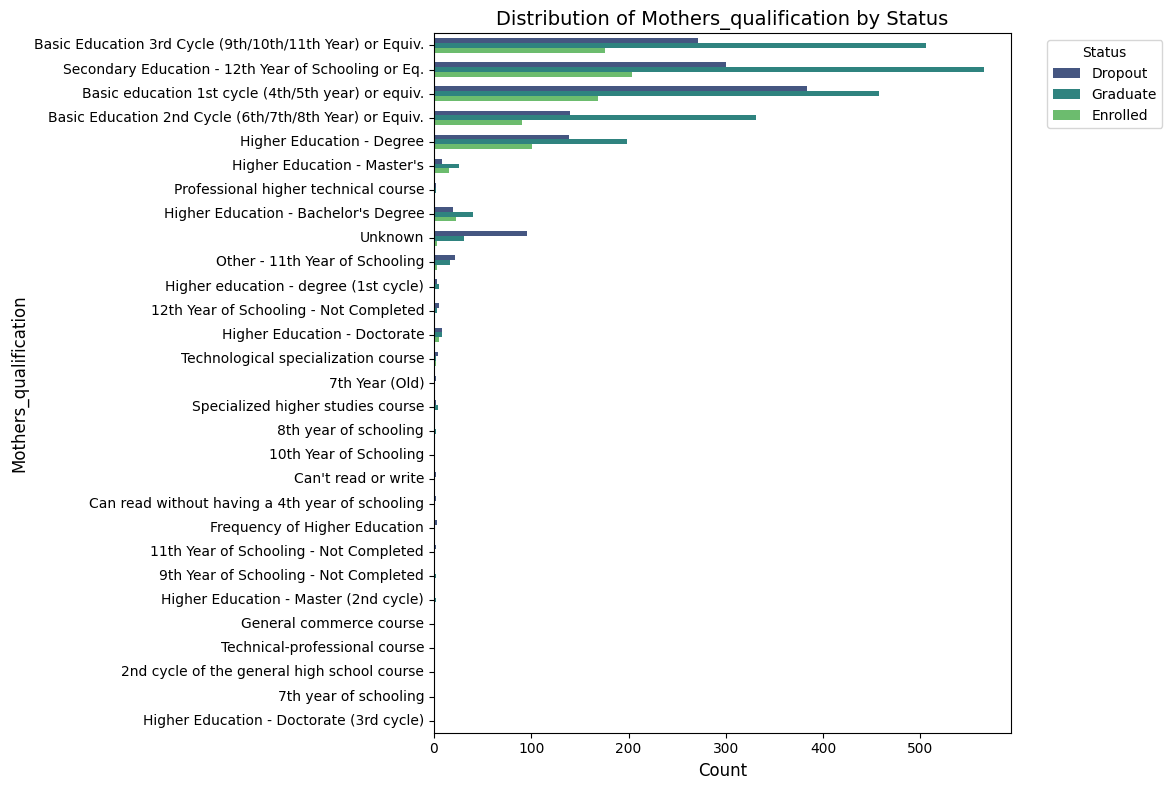

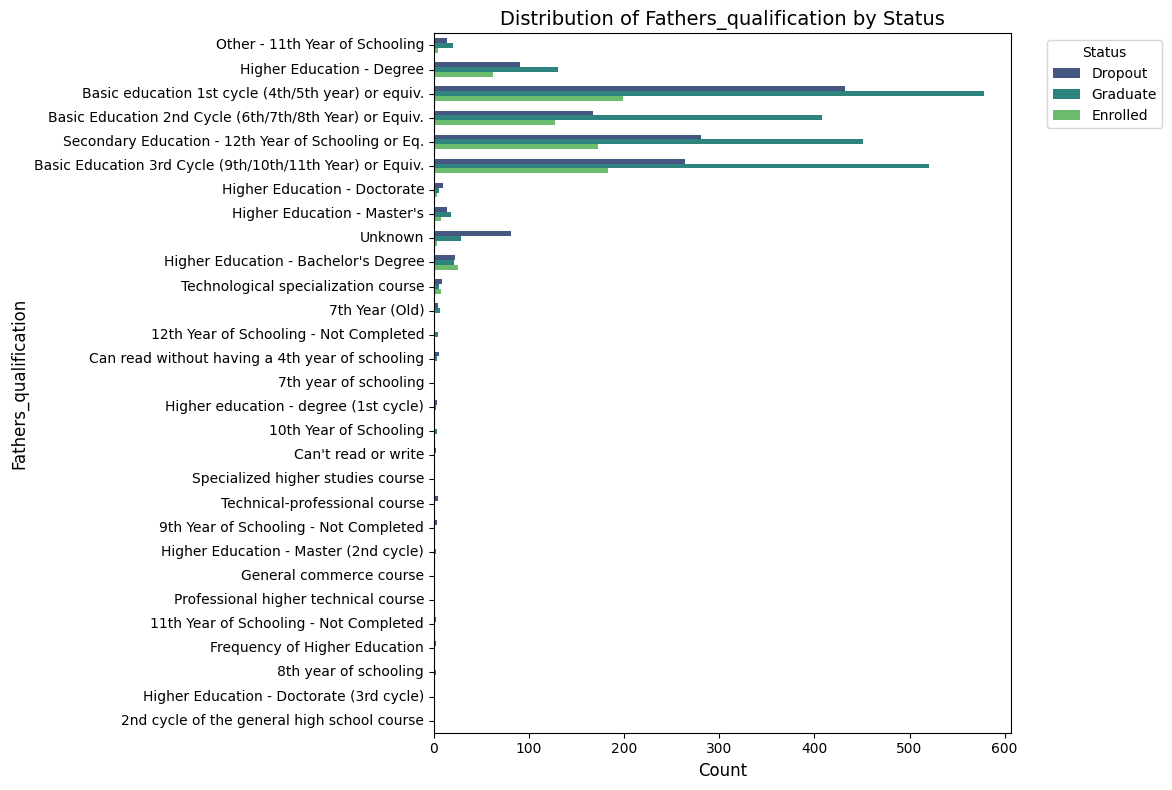

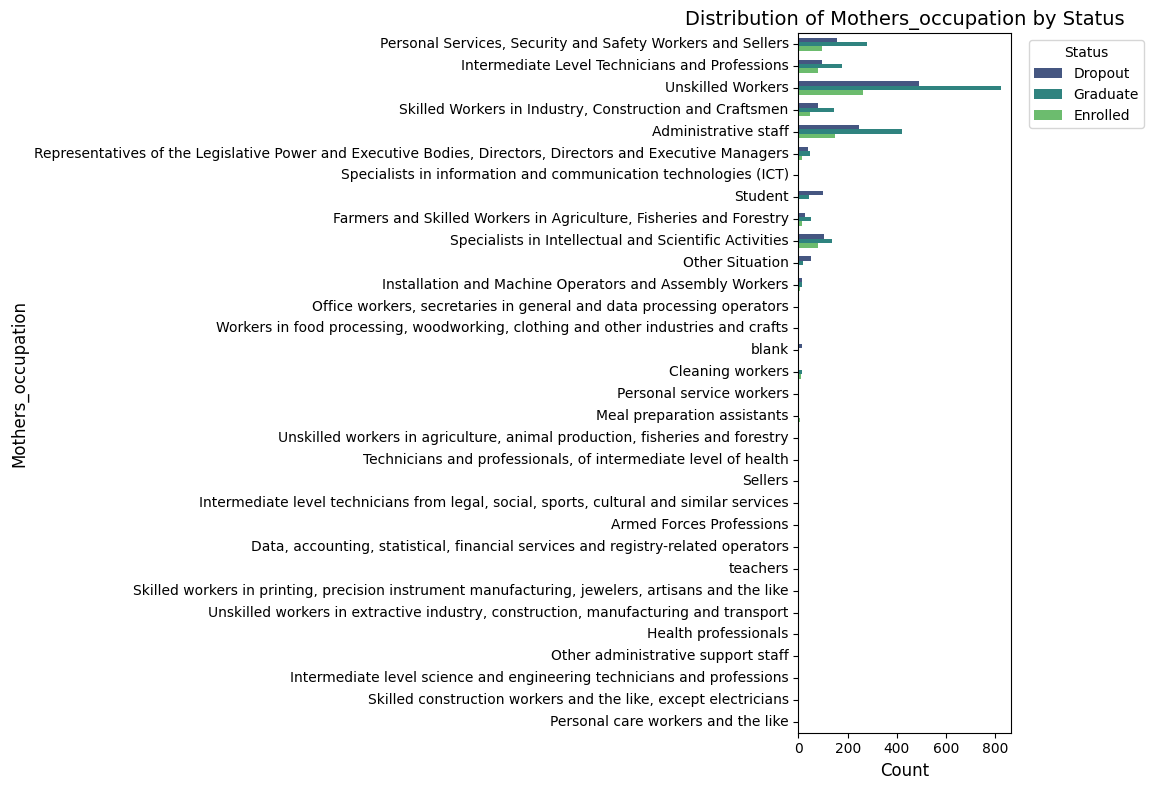

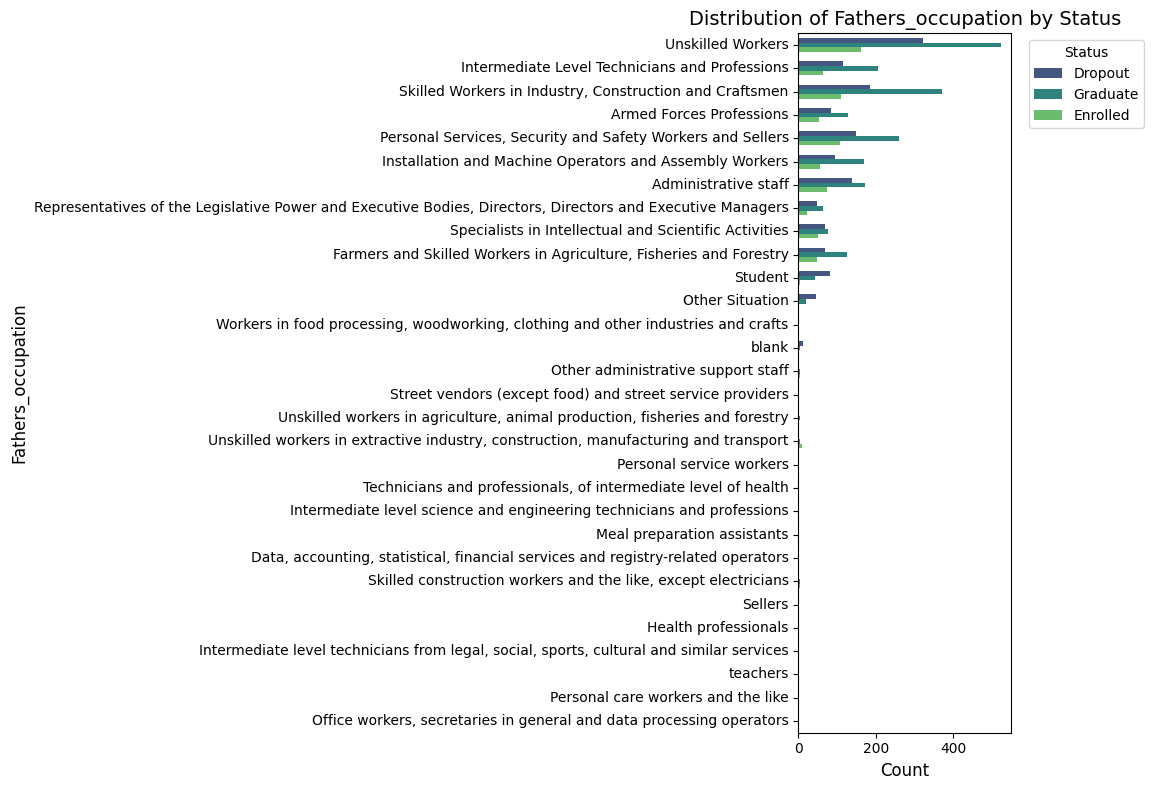

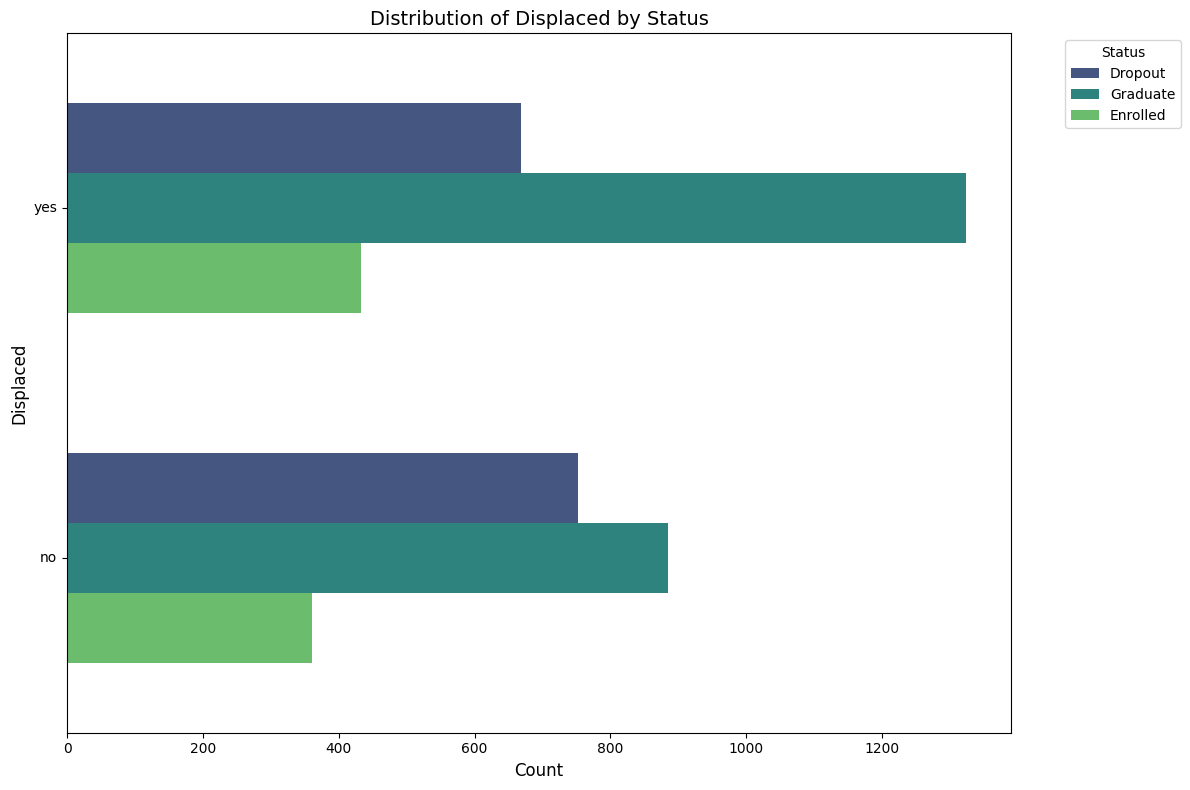

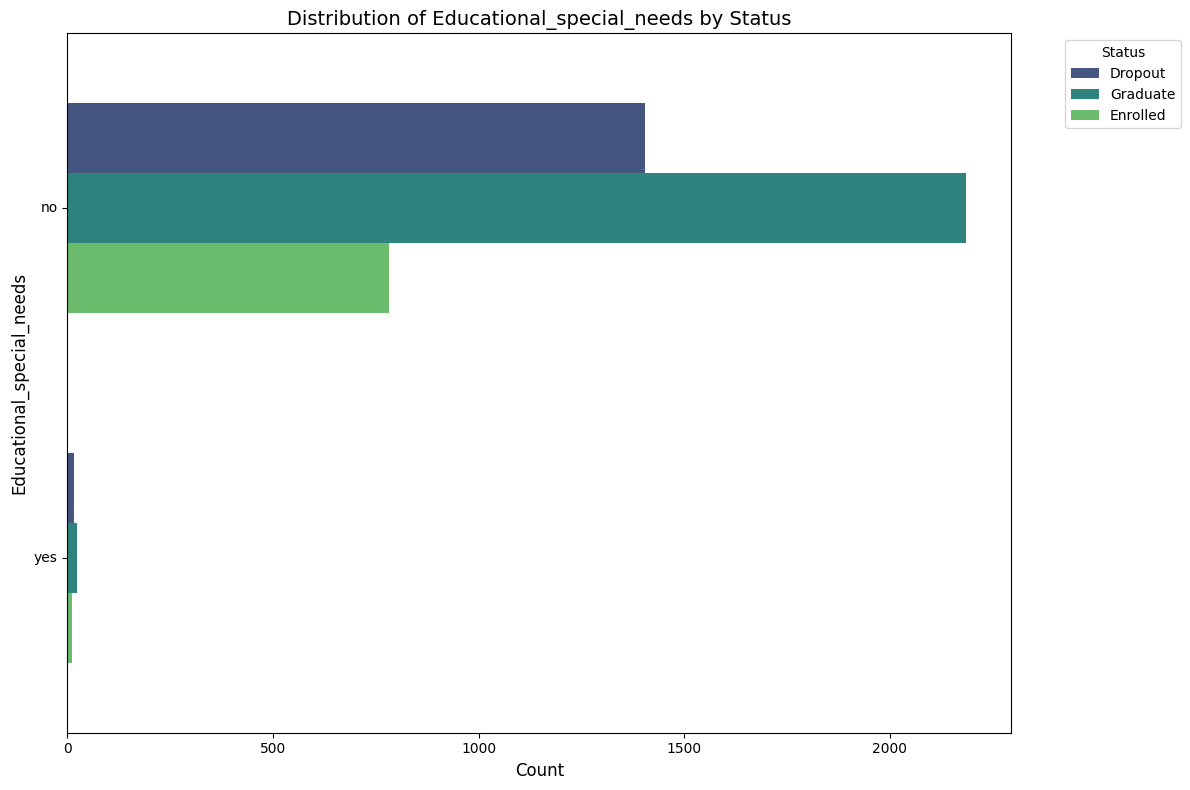

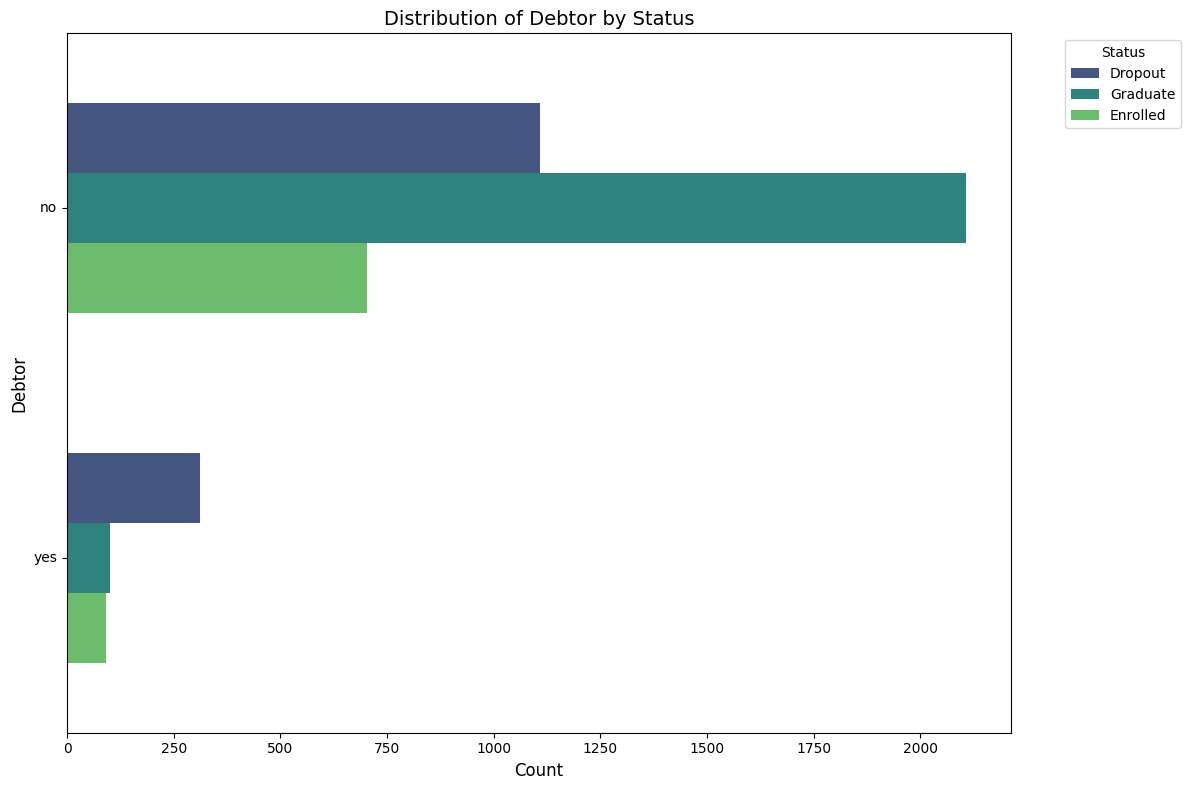

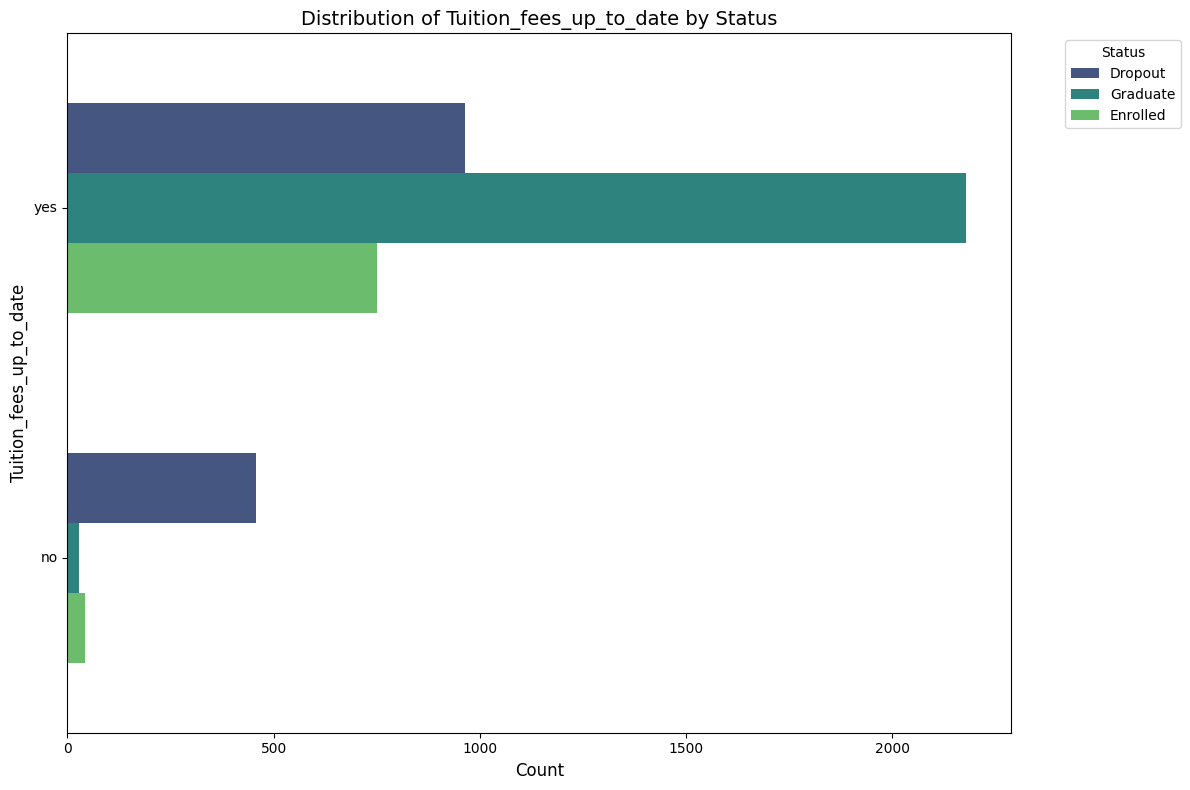

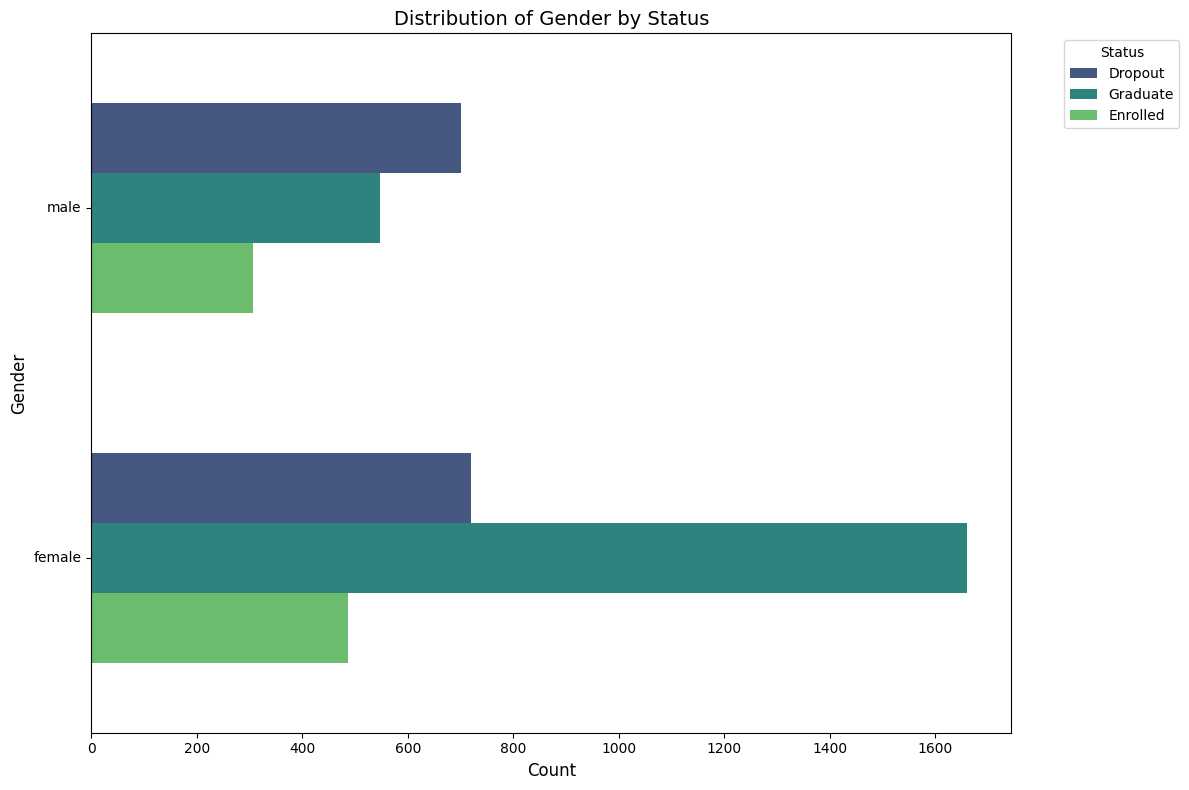

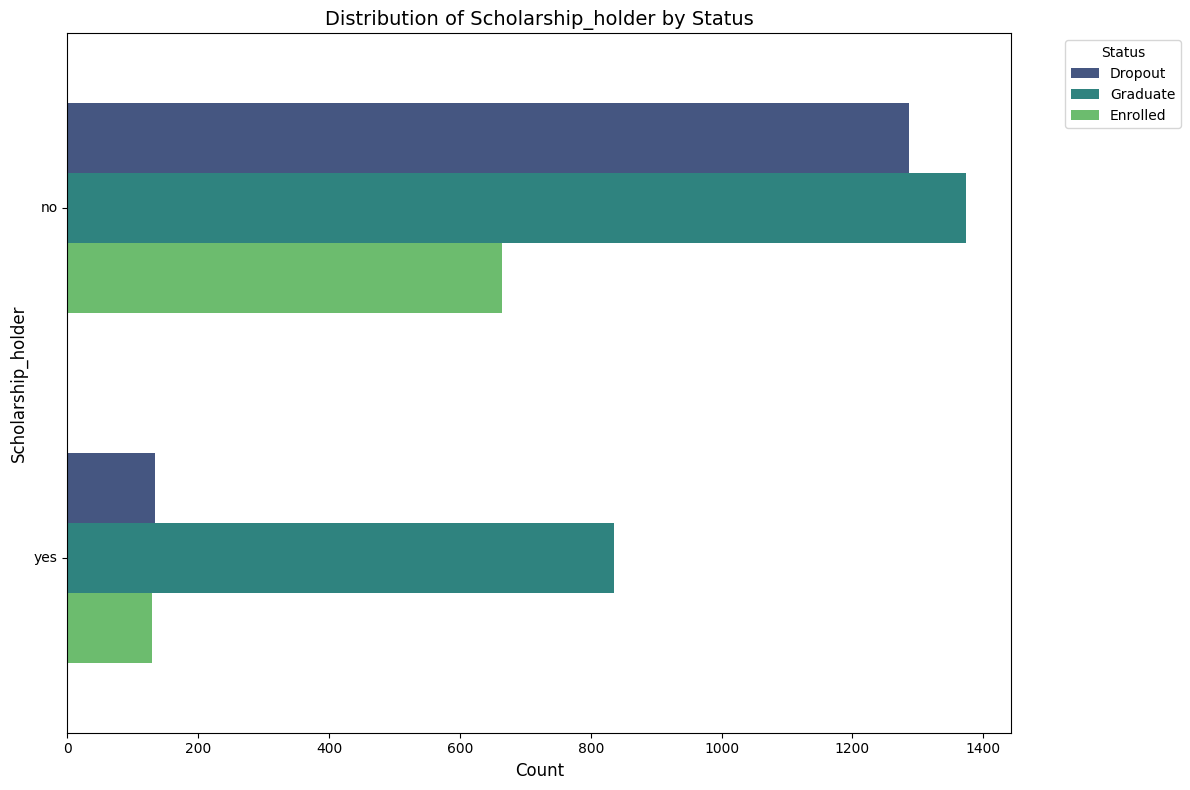

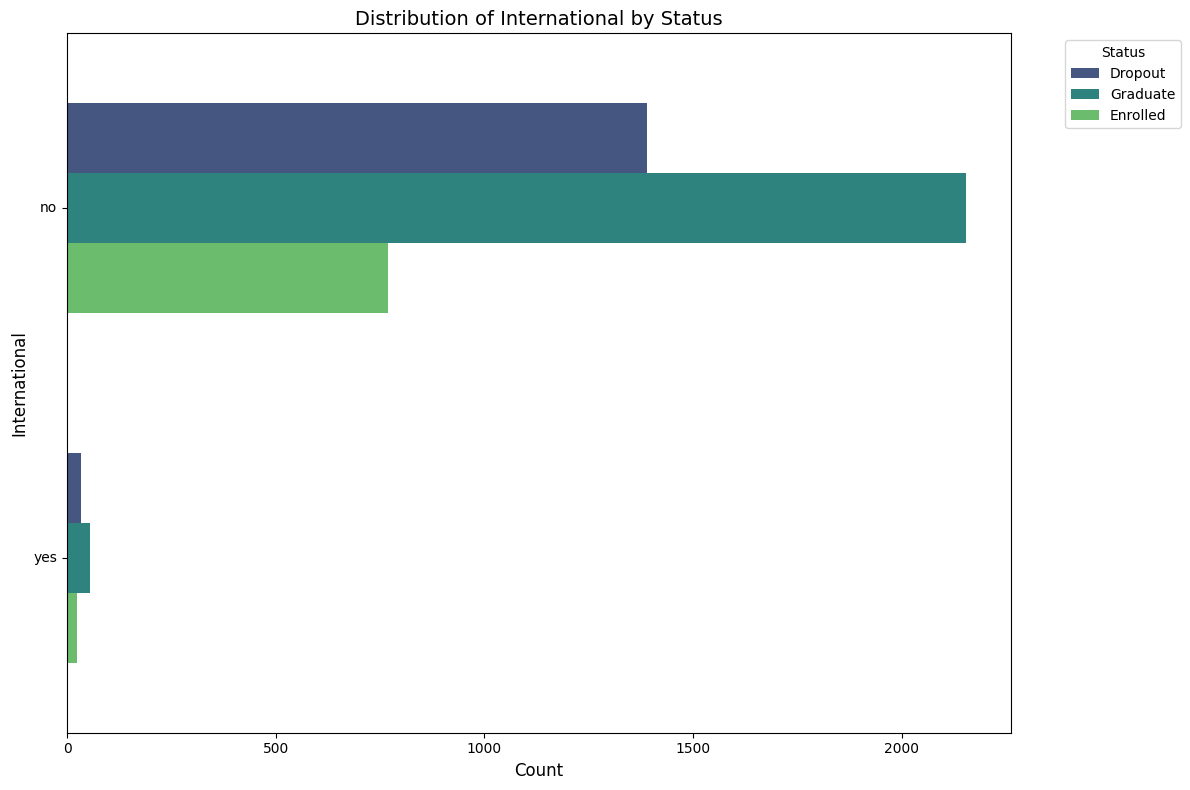

In [10]:
# Daftar kolom kategori
category_cols = [
    'Marital_status', 'Application_mode', 'Course',
    'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality', 'Mothers_qualification',
    'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
    'Displaced', 'Educational_special_needs', 'Debtor',
    'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International'
]

# Menampilkan plot horizontal bar chart satu per satu
for col in category_cols:
    plt.figure(figsize=(12, 8))
    ax = sns.countplot(data=df, y=col, hue='Status', palette='viridis', dodge=True, width=0.6)

    # Menyesuaikan jarak antar kategori dengan mengatur jarak antar ticks
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(ax.get_yticklabels(), va='center')

    # Menambahkan judul dan label
    plt.title(f'Distribution of {col} by Status', fontsize=14)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.legend(title='Status', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    plt.show()

**Insight:**

Terdapat beberapa pola menarik seperti kolom `marital status` menunjukan bahwa yang cenderung melakukan dropout adalah orang dengan status `married`. Kemudian gender female tidak ada yang pernah melakukan dropout.

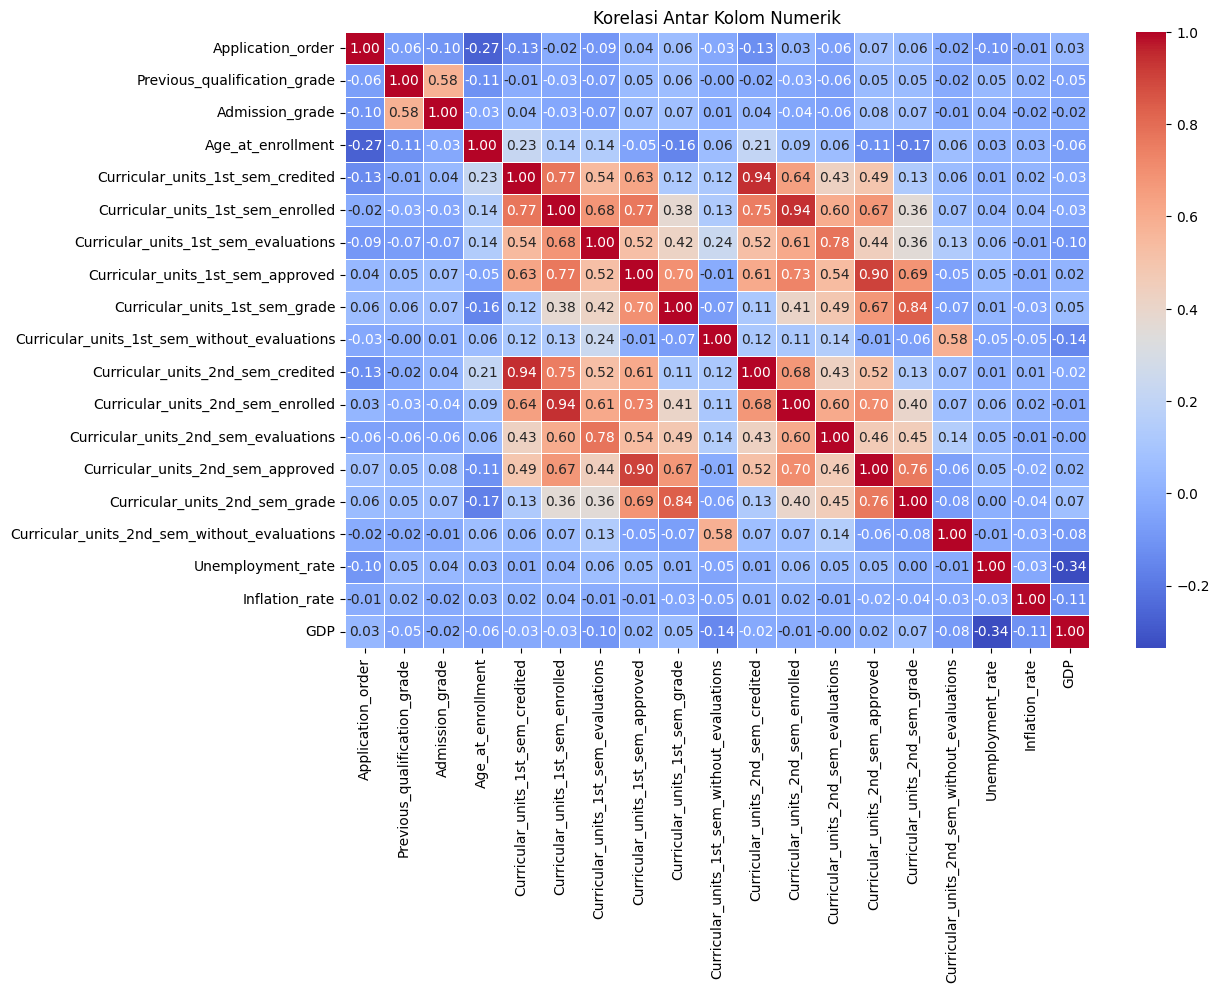

In [11]:
# Pilih kolom numerik
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Menghitung korelasi antar kolom numerik
correlation_matrix = df[numerical_cols].corr()

# Membuat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Kolom Numerik')
plt.show()

**Insight:**

🔍 **Korelasi Tinggi (positif kuat)**

1. `Curricular_units_1st_sem_enrolled` vs `Curricular_units_1st_sem_evaluations`

- Korelasi ≈ 0.77

- Artinya: Mahasiswa yang mendaftar banyak mata kuliah di semester 1, cenderung mengikuti lebih banyak evaluasi (ujian/penilaian).

2. `Curricular_units_1st_sem_evaluations` vs `Curricular_units_1st_sem_approved`

- Korelasi ≈ 0.65

- Mahasiswa yang mengikuti lebih banyak evaluasi, cenderung lulus lebih banyak mata kuliah.

3. `Curricular_units_1st_sem_grade` vs `Curricular_units_1st_sem_approved`

- Korelasi ≈ 0.66

- Nilai akhir semester 1 yang tinggi umumnya berbanding lurus dengan jumlah mata kuliah yang dinyatakan lulus.

4. Korelasi serupa juga terjadi di semester 2:

- enrolled ↔ evaluations, evaluations ↔ approved, approved ↔ grade, semuanya menunjukkan korelasi positif yang konsisten dan logis.



## **Data Preparation / Preprocessing**

### **Menangani Missing Values**

In [12]:
df['Fathers_qualification'] = df['Fathers_qualification'].fillna('Unknown')
df['Fathers_occupation'] = df['Fathers_occupation'].fillna('Unknown')

In [13]:
# Menghapus baris dengan Status = 'Enrolled'
df = df[df['Status'] != 'Enrolled']

In [14]:
df['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421


In [15]:
columns_to_drop = ['Curricular_units_1st_sem_credited',
                   'Curricular_units_2nd_sem_credited',]

# Drop columns from the dataset
df = df.drop(columns=columns_to_drop)

In [16]:
# Mengecek kolom bertipe kategori
category_columns = df.select_dtypes(include=['object']).columns

# Membuat dictionary untuk menyimpan encoder
encoders = {}

# Iterasi setiap kolom kategori untuk melakukan encoding
for column in category_columns:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    encoders[column] = encoder  # Simpan encoder untuk kolom tersebut

# Buat folder 'model' jika belum ada
os.makedirs("model", exist_ok=True)

# Menyimpan encoder ke file
joblib_path = "model/encoder.joblib"
joblib.dump(encoders, joblib_path)

['model/encoder.joblib']

In [17]:
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,4,3,5,2,0,15,122.0,13,9,22,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,4,9,1,15,0,15,160.0,13,24,16,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,4,0,5,5,0,15,122.0,13,10,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,4,3,2,8,0,15,122.0,13,8,10,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,3,14,1,14,1,15,100.0,13,10,8,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,4,0,6,8,0,15,125.0,13,24,24,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,4,0,2,8,0,15,120.0,15,24,24,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,4,0,1,11,0,15,154.0,13,10,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,4,0,1,9,0,15,180.0,13,10,10,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [19]:
df.to_csv('final.csv', index=False)

## **Modeling**

In [20]:
# Pisahkan fitur dan target (kolom 'Status' sebagai target)
X = df.drop(columns=['Status'])
y = df['Status']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
y_train.value_counts()

,count
Status,
1,1767
0,1137


In [25]:
# Terapkan SMOTE untuk oversampling pada data numerik dan kategori
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [26]:
y_resampled.value_counts()

,count
Status,
1,1767
0,1767


In [27]:
X_resampled.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
       'Inflation_rate', 'GDP'],
      dtype='ob

In [28]:
X_resampled

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
0,4,16,1,1,0,16,150.000000,13,9,10,...,14.333333,0,6,7,6,13.833333,0,13.900000,-0.300000,0.790000
1,3,14,1,10,1,15,135.000000,13,28,28,...,0.000000,0,5,5,0,0.000000,0,7.600000,2.600000,0.320000
2,4,0,1,13,0,15,121.000000,13,24,24,...,10.833333,0,6,7,6,12.142857,0,11.100000,0.600000,2.020000
3,4,0,4,11,0,15,135.000000,13,10,10,...,13.381429,0,8,8,7,13.381429,0,10.800000,1.400000,1.740000
4,3,14,1,14,1,13,110.000000,13,28,28,...,13.750000,0,6,9,6,12.500000,0,7.600000,2.600000,0.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,3,14,1,15,0,7,133.100000,13,8,8,...,0.000000,0,6,0,0,0.000000,0,14.774849,3.033084,-3.448801
3530,3,14,1,7,0,5,133.100000,13,8,8,...,0.000000,0,5,6,0,5.885542,0,11.918253,2.753675,-0.284627
3531,4,3,1,8,0,15,133.239589,13,16,17,...,0.000000,0,4,7,0,0.000000,0,7.661843,2.564661,0.350038
3532,4,0,1,3,0,15,120.420995,13,9,9,...,11.473665,0,5,10,3,11.014070,0,9.191558,-0.406277,-2.721644


In [39]:
# Kolom numerik dan kategori berdasarkan definisi
numerical_cols = ['Previous_qualification_grade',
                  'Admission_grade', 'Age_at_enrollment',
                  'Curricular_units_1st_sem_enrolled',
                  'Curricular_units_1st_sem_evaluations',
                  'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
                  'Curricular_units_1st_sem_without_evaluations',
                  'Curricular_units_2nd_sem_enrolled',
                  'Curricular_units_2nd_sem_evaluations',
                  'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
                  'Curricular_units_2nd_sem_without_evaluations',
                  'Unemployment_rate', 'Inflation_rate', 'GDP']

category_cols = [
    'Marital_status', 'Application_mode', 'Course',
    'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality', 'Mothers_qualification',
    'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
    'Displaced', 'Educational_special_needs', 'Debtor',
    'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International'
]

In [40]:
# 1. Buat transformer untuk numerik dan kategori
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [41]:
# 2. Gabungkan transformer dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, category_cols)
    ]
)

In [42]:
# 3. Buat pipeline untuk model Random Forest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [43]:
# 4. Latih model dengan data oversampling
pipeline.fit(X_resampled, y_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Previous_qualification_grade',
                                                   'Admission_grade',
                                                   'Age_at_enrollment',
                                                   'Curricular_units_1st_sem_enrolled',
                                                   'Curricular_units_1st_sem_evaluations',
                                                   'Curricular_units_1st_sem_approved',
                                                   'Curricular_units_1st_sem_grade',
                                                   'Curricular_units_1...
                                                   'Application_mode', 'Course',
                                                   'Daytime_evening_attendance',
                                                   'Previous_qualification',
                                                   'Nacionality',
                                                   'Mothers_qualification',
                                                   'Fathers_qualification',
                                                   'Mothers_occupation',
                                                   'Fathers_occupation',
                                                   'Displaced',
                                                   'Educational_special_needs',
                                                   'Debtor',
                                                   'Tuition_fees_up_to_date',
                                                   'Gender',
                                                   'Scholarship_holder',
                                                   'International'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [44]:
# 5. Prediksi pada data uji
y_pred = pipeline.predict(X_test)

## **Evaluation**

In [51]:
# 6. Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 90.77%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       284
           1       0.90      0.96      0.93       442

    accuracy                           0.91       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726



In [46]:
# Simpan pipeline model yang telah dilatih
joblib.dump(pipeline, 'model/random_forest_pipeline.joblib')

['model/random_forest_pipeline.joblib']

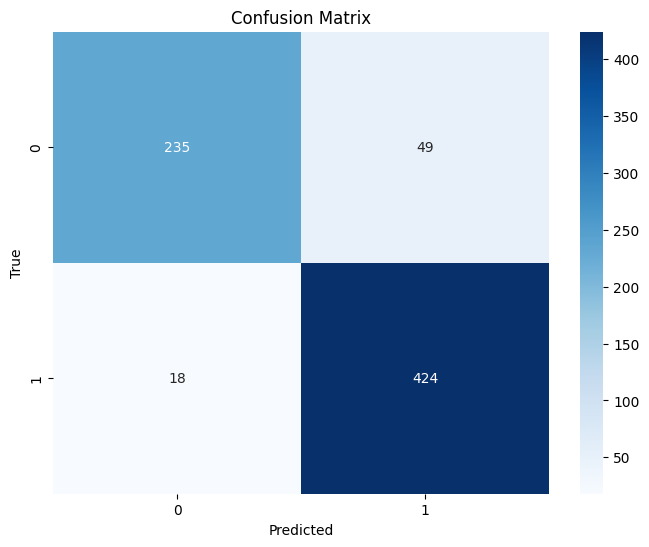

In [49]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()